# Lesson 3: Basic Calculations & Plots

## Initial setup

Import libraries and initialize variables to pick up where we left off in the previous lesson.

In [1]:
import pandas

In [2]:
weather = pandas.read_csv('data/weather_YVR.csv')
world = pandas.read_csv('data/gapminder_world_data_2018.csv')

# Working with DataFrame Columns

In [3]:
weather.head(3)

,Date,Year,Month,Day,T_mean (C),T_high (C),T_low (C),Rain (mm),Snow (cm),Total Precip (mm)
0,1938-01-01,1938,1,1,4.4,9.4,-0.6,NaN,NaN,0.3
1,1938-01-02,1938,1,2,4.5,7.2,1.7,NaN,NaN,0.5
2,1938-01-03,1938,1,3,1.7,7.2,-3.9,0.0,0.0,0.0


Similar to a dictionary, we can index a specific column of a DataFrame using the column name inside square brackets:
> Pro Tip: In Jupyter notebooks, auto-complete works for DataFrame column names!

In [4]:
weather['T_mean (C)']

0        4.4
1        4.5
2        1.7
3        2.2
4        2.2
5        2.3
6        2.2
7        2.5
8        4.2
9        5.8
10       4.2
11       7.8
12       6.1
13       6.7
14       4.5
15       4.5
16       2.8
17       4.8
18       3.4
19       2.8
20       5.0
21       3.1
22       2.8
23       3.4
24       4.8
25       0.3
26       2.8
27       4.5
28       1.7
29      -2.3
        ... 
29160    5.3
29161    3.6
29162    3.5
29163    2.6
29164    2.2
29165    2.9
29166    1.9
29167    1.9
29168    4.1
29169    3.8
29170    4.8
29171    4.4
29172    3.0
29173    4.2
29174    4.1
29175    6.0
29176    6.2
29177    2.8
29178    1.7
29179   -0.2
29180    1.5
29181   -1.5
29182   -2.0
29183   -0.3
29184   -0.4
29185    0.0
29186    3.4
29187    2.8
29188    1.3
29189   -0.1
Name: T_mean (C), Length: 29190, dtype: float64

The numbers on the left are the **index**

What type of object is this?

In [5]:
temp_mean = weather['T_mean (C)']
type(temp_mean)

pandas.core.series.Series

It's a Series, another data structure from the `pandas` library.

- **DataFrame:** 2-dimensional array, like a table in a spreadsheet
  - The rows are axis 0
  - The columns are axis 1
- **Series:** 1-dimensional array, like a single column or row in a spreadsheet
  - Each individual column or row of a DataFrame is represented as a Series

Let's look at the Series again:

In [6]:
temp_mean

0        4.4
1        4.5
2        1.7
3        2.2
4        2.2
5        2.3
6        2.2
7        2.5
8        4.2
9        5.8
10       4.2
11       7.8
12       6.1
13       6.7
14       4.5
15       4.5
16       2.8
17       4.8
18       3.4
19       2.8
20       5.0
21       3.1
22       2.8
23       3.4
24       4.8
25       0.3
26       2.8
27       4.5
28       1.7
29      -2.3
        ... 
29160    5.3
29161    3.6
29162    3.5
29163    2.6
29164    2.2
29165    2.9
29166    1.9
29167    1.9
29168    4.1
29169    3.8
29170    4.8
29171    4.4
29172    3.0
29173    4.2
29174    4.1
29175    6.0
29176    6.2
29177    2.8
29178    1.7
29179   -0.2
29180    1.5
29181   -1.5
29182   -2.0
29183   -0.3
29184   -0.4
29185    0.0
29186    3.4
29187    2.8
29188    1.3
29189   -0.1
Name: T_mean (C), Length: 29190, dtype: float64

The last line of the output above tells us that our Series `temp_mean` is named `'T_mean (C)'`, it is 29190 rows long, and its data type is `float64`.

Many of the methods we use on a DataFrame can also be used on a Series, and vice versa

In [7]:
temp_mean.head()

0    4.4
1    4.5
2    1.7
3    2.2
4    2.2
Name: T_mean (C), dtype: float64

In [8]:
weather['Snow (cm)'].describe()

count    29138.000000
mean         0.121779
std          1.146298
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         41.000000
Name: Snow (cm), dtype: float64

In [9]:
weather['Rain (mm)'].max()

91.6

# Simple Calculations

We can perform calculations on Series.
- Let's convert temperature from Celsius to Fahrenheit (multiply by 1.8 and add 32)

In [10]:
temp_mean_F = 1.8 * temp_mean + 32
temp_mean_F.head()

0    39.92
1    40.10
2    35.06
3    35.96
4    35.96
Name: T_mean (C), dtype: float64

> Side note: the new Series `temp_mean_F` still has the same name (`'T_mean (C)'`) as the original Series. If we want to change the name, we can update the `name` attribute of the Series:

In [11]:
temp_mean_F.name = 'T_mean (F)'
temp_mean_F.head()

0    39.92
1    40.10
2    35.06
3    35.96
4    35.96
Name: T_mean (F), dtype: float64

Similar to a dictionary, we can add a new column to a DataFrame by simply assigning a value to a new column name:

In [12]:
weather['Rain (inches)'] = weather['Rain (mm)'] / 25.4
weather.tail()

,Date,Year,Month,Day,T_mean (C),T_high (C),T_low (C),Rain (mm),Snow (cm),Total Precip (mm),Rain (inches)
29185,2017-12-27,2017,12,27,0.0,1.9,-1.9,3.0,0.2,3.2,0.118110
29186,2017-12-28,2017,12,28,3.4,5.7,1.1,20.8,0.0,20.8,0.818898
29187,2017-12-29,2017,12,29,2.8,4.7,0.9,27.6,0.0,27.6,1.086614
29188,2017-12-30,2017,12,30,1.3,4.3,-1.8,2.2,0.0,2.2,0.086614
29189,2017-12-31,2017,12,31,-0.1,3.8,-3.9,0.0,0.0,0.0,0.000000


> Side note: By creating a new column labelled `'Rain (inches)'`, the Series in this column is automatically given the same name as its column label:

In [13]:
weather['Rain (inches)'].name

'Rain (inches)'

Basic math operations involving multiple columns are performed element-wise:

In [14]:
weather['T_range (C)'] = weather['T_high (C)'] - weather['T_low (C)']
weather.head()

,Date,Year,Month,Day,T_mean (C),T_high (C),T_low (C),Rain (mm),Snow (cm),Total Precip (mm),Rain (inches),T_range (C)
0,1938-01-01,1938,1,1,4.4,9.4,-0.6,NaN,NaN,0.3,NaN,10.0
1,1938-01-02,1938,1,2,4.5,7.2,1.7,NaN,NaN,0.5,NaN,5.5
2,1938-01-03,1938,1,3,1.7,7.2,-3.9,0.0,0.0,0.0,0.0,11.1
3,1938-01-04,1938,1,4,2.2,7.2,-2.8,0.0,0.0,0.0,0.0,10.0
4,1938-01-05,1938,1,5,2.2,7.2,-2.8,0.0,0.0,0.0,0.0,10.0


# Saving to CSV

Now that we've added some new columns, let's save the DataFrame to a new CSV file using the `to_csv` method.

- When you first start working with `to_csv`, it's easy to accidentally overwrite existing files, so you might want to first make a copy of your data folder, as a backup.

In [15]:
weather.to_csv('data/extra_weather_YVR.csv', index=False)

- By default, the `to_csv` method will save the DataFrame's index as an additional column in the CSV file. To turn this off, we use the keyword argument `index=False`.

Check out your new file in the JupyterLab CSV viewer!

# Multiple Columns of a DataFrame

We can also select several columns, in whatever order we like, using a list of column names:

In [16]:
subset_columns = ['Date', 'Total Precip (mm)', 'T_low (C)', 'T_high (C)']
weather_subset = weather[subset_columns]
weather_subset.head()

,Date,Total Precip (mm),T_low (C),T_high (C)
0,1938-01-01,0.3,-0.6,9.4
1,1938-01-02,0.5,1.7,7.2
2,1938-01-03,0.0,-3.9,7.2
3,1938-01-04,0.0,-2.8,7.2
4,1938-01-05,0.0,-2.8,7.2


`weather_subset` is a DataFrame containing only the specified columns of `weather`.

We can use subsets  to compute summary statistics just for specific columns of interest:

In [17]:
stats_columns = ['Rain (mm)', 'Snow (cm)']
weather[stats_columns].max()

Rain (mm)    91.6
Snow (cm)    41.0
dtype: float64

If our list of columns is pretty short, it's often convenient to skip a step and define the list directly within the indexing operator: 

In [18]:
weather[['Rain (mm)', 'Snow (cm)']].max()

Rain (mm)    91.6
Snow (cm)    41.0
dtype: float64

Note the double square brackets!
- These are required because we need both:
  - A pair of square brackets to extract the subset, AND
  - A pair of square brackets to define the list of columns to select.

What happens if we forget and just use a single pair of square brackets? Try running the following code in the cell below:
```python
weather['Rain (mm)', 'Snow (cm)'].max()
```

- It doesn't work! We get an error &mdash; `KeyError: ('Rain (mm)', 'Snow (cm)')`
- This is a very easy mistake to make, especially when you're coding on the fly in Jupyter
- If we don't explicitly define a list by enclosing the column names in a second set of square brackets within the outer square brackets, `pandas` assumes that the comma-separated items are a tuple: `('Rain (mm)', 'Snow (cm)')`
- Since column labels can be any type of object, not just strings, a tuple can actually be a column label!
- So `pandas` looks for a column whose label is the tuple `('Rain (mm)', 'Snow (cm)')`, can't find it, and throws a `KeyError` exception

# Plots

- `pandas` DataFrames and Series provide methods to quickly and easily plot your data
- These methods use the `matplotlib` library behind the scenes

First we need to use the magic command `%matplotlib inline` so that our plots will display inline in our Jupyter notebook
- This command only needs to be run once, and it's good practice to put it at the start of your notebook with the `import` commands

In [19]:
%matplotlib inline

`plot` is a convenience method for DataFrames and Series which allows us to quickly generate plots with useful defaults.
- Let's use the `plot` method on our Series `temp_mean` and see what happens.

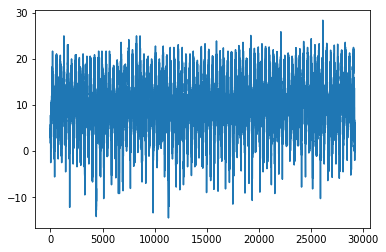

In [20]:
temp_mean.plot()

- It creates a line plot by default
- It would be nice if the graph were wider
- The documentation for the plot method lists keyword arguments that can be used to customize our plot

In [21]:
temp_mean.plot?

Signature:      temp_mean.plot(kind='line', ax=None, figsize=None, use_index=True, title=None, grid=None, legend=False, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, label=None, secondary_y=False, **kwds)
Type:           SeriesPlotMethods
String form:    <pandas.plotting._core.SeriesPlotMethods object at 0x000001E6E5A8AE10>
File:           c:\users\jenfl\anaconda3\lib\site-packages\pandas\plotting\_core.py
Docstring:     
Series plotting accessor and method

Examples
--------
>>> s.plot.line()
>>> s.plot.bar()
>>> s.plot.hist()

Plotting methods can also be accessed by calling the accessor as a method
with the ``kind`` argument:
``s.plot(kind='line')`` is equivalent to ``s.plot.line()``
Call docstring:
Make plots of Series using matplotlib / pylab.

*New in version 0.17.0:* Each plot kind has a corresponding method on the
``Series.plot`` accessor:
``s.plot(kind

The keyword argument `figsize` will help us improve our plot:

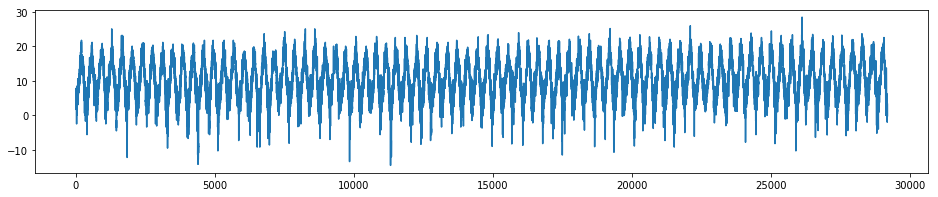

In [22]:
temp_mean.plot(figsize=(16, 3))

> Pro Tip! The `plot` method returns a `matplotlib.Axes` object, which is displayed as cell output. To suppress displaying this output, add a semi-colon to the end of the command.

- The x-axis is the Series index, which in this case is just the row numbers and is not very useful
- Since we're looking at **timeseries** data, it would be much better to have the dates on the x-axis
- Luckily, pandas makes it very easy to do this!

First we use the function `pandas.to_datetime` to convert the `'Date'` column of `weather` from text to a **datetime** data type:

In [23]:
weather['Date'] = pandas.to_datetime(weather['Date'])
weather.head()

,Date,Year,Month,Day,T_mean (C),T_high (C),T_low (C),Rain (mm),Snow (cm),Total Precip (mm),Rain (inches),T_range (C)
0,1938-01-01,1938,1,1,4.4,9.4,-0.6,NaN,NaN,0.3,NaN,10.0
1,1938-01-02,1938,1,2,4.5,7.2,1.7,NaN,NaN,0.5,NaN,5.5
2,1938-01-03,1938,1,3,1.7,7.2,-3.9,0.0,0.0,0.0,0.0,11.1
3,1938-01-04,1938,1,4,2.2,7.2,-2.8,0.0,0.0,0.0,0.0,10.0
4,1938-01-05,1938,1,5,2.2,7.2,-2.8,0.0,0.0,0.0,0.0,10.0


The DataFrame doesn't look any different, but let's check out the `dtypes` attribute.
- Recall that the `'Date'` column was of type `object` before.

In [24]:
weather.dtypes

Date                 datetime64[ns]
Year                          int64
Month                         int64
Day                           int64
T_mean (C)                  float64
T_high (C)                  float64
T_low (C)                   float64
Rain (mm)                   float64
Snow (cm)                   float64
Total Precip (mm)           float64
Rain (inches)               float64
T_range (C)                 float64
dtype: object

Now the `'Date'` column has a `datetime64[ns]` data type and we can use it as the x-axis for our line plot.
- If you look at the documentation for the `plot` method of the `weather` DataFrame, you'll see a couple of extra keyword arguments `x` and `y`.
- These allow us to specify which DataFrame column to use for the x and y axes.

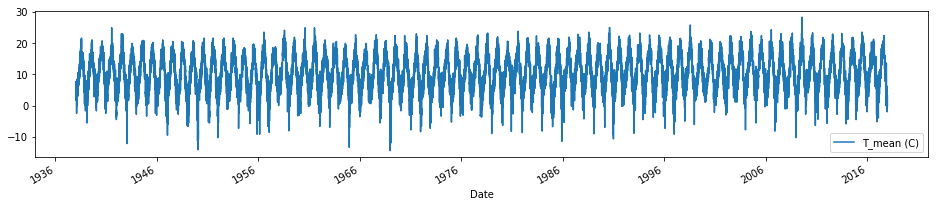

In [25]:
weather.plot(x='Date', y='T_mean (C)', figsize=(16, 3));

Now we can understand the timeseries much better!

# Bonus: Timeseries Demo
> Note: These examples use syntax we haven't learned yet - they are for just for demonstration!

If we set the `'Date'` column as the index of `weather`, we can do really cool things such as extracting date ranges with `'yyyy-mm-dd'` syntax, for example:

In [26]:
weather_ts = weather.set_index('Date')

In [27]:
weather_ts.loc['2012-10-15':'2012-10-20']

,Year,Month,Day,T_mean (C),T_high (C),T_low (C),Rain (mm),Snow (cm),Total Precip (mm),Rain (inches),T_range (C)
Date,,,,,,,,,,,
2012-10-15,2012,10,15,11.1,13.4,8.8,3.6,0.0,3.6,0.141732,4.6
2012-10-16,2012,10,16,12.6,15.2,9.9,0.0,0.0,0.0,0.000000,5.3
2012-10-17,2012,10,17,9.1,12.7,5.4,0.0,0.0,0.0,0.000000,7.3
2012-10-18,2012,10,18,11.0,12.4,9.5,22.8,0.0,22.8,0.897638,2.9
2012-10-19,2012,10,19,11.1,13.4,8.8,1.0,0.0,1.0,0.039370,4.6
2012-10-20,2012,10,20,7.7,10.3,5.1,2.0,0.0,2.0,0.078740,5.2


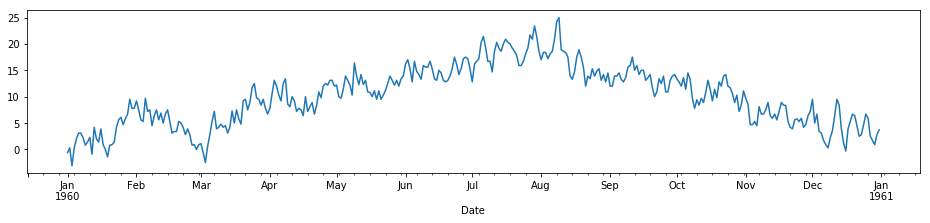

In [28]:
weather_ts.loc['1960', 'T_mean (C)'].plot(figsize=(16, 3));

`pandas` has extremely powerful functionality for working with timeseries data:
- Parse dates and times into their components (year, month, day, hour, etc.)
- Extract a subset of a DataFrame or Series for a specified date range
- Convert between different time zones
- Aggregate on different timescales (e.g. yearly / monthly / weekly / etc. means or totals)
- Resampling (e.g. daily means of hourly data)
- Rolling windows
- and much more!

For more details and examples: https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

# Plots cont'd

We can create different kinds of plots using the `kind` keyword argument.
- For example, a histogram of daily high temperatures, using the `bins` keyword to specify the number of bins.

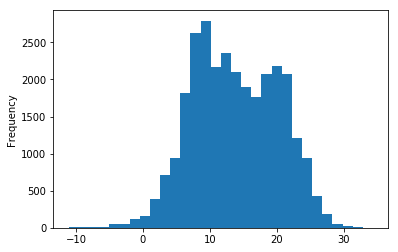

In [29]:
weather['T_high (C)'].plot(kind='hist', bins=30);

# Bonus: Plotting Multiple Columns

We can also plot multiple columns at once.
- For example, line plots of the daily high, low and mean temperatures.
- First, we need to extract the columns we want to plot.
- Let's also use the `head` method to plot just the first 1000 rows.
> Note: In Lesson 5, we'll learn a better way of extracting a subset of rows.

In [30]:
cols_plot = ['Date', 'T_low (C)', 'T_mean (C)', 'T_high (C)']
temp_data = weather[cols_plot].head(1000)

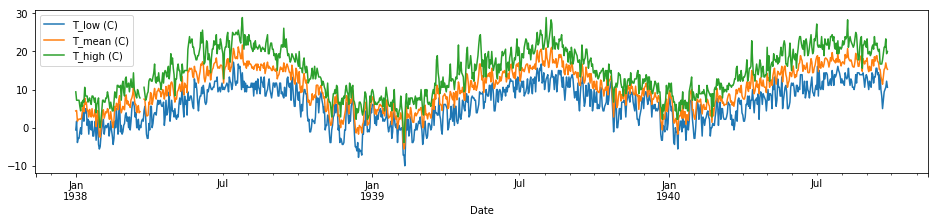

In [31]:
temp_data.plot(x='Date', figsize=(16, 3));

We can also plot each column separately using the `subplots` keyword argument:

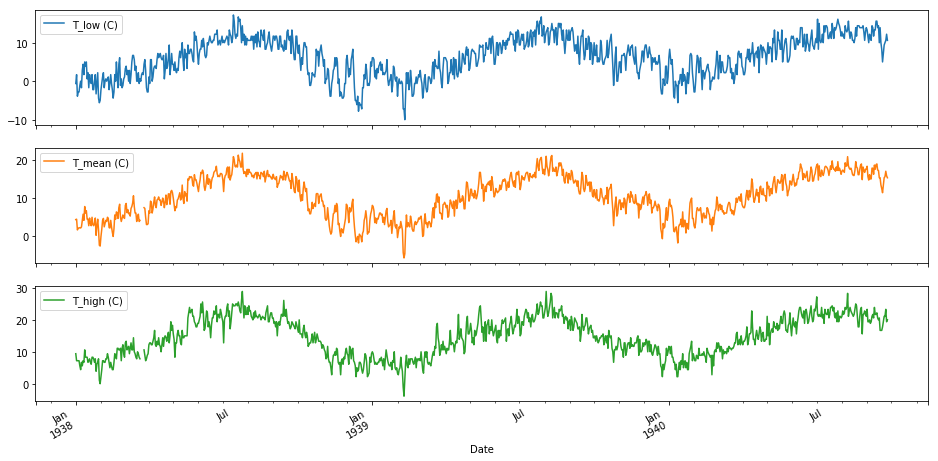

In [32]:
temp_data.plot(x='Date', subplots=True, figsize=(16, 8));

# Customizing Plots

There are many more ways we could customize our plots (labels, axes limits and ticks, etc.) and many other types of plots that can be created with `pandas` and `matplotlib`. For more details and examples:
- https://pandas.pydata.org/pandas-docs/stable/visualization.html
- https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py
- https://matplotlib.org/tutorials/introductory/sample_plots.html
- For more on colours in `pandas` and `matplotlib`:
  - https://matplotlib.org/users/colors.html
  - https://matplotlib.org/users/colormaps.html

# Exercise 3

Returning to our DataFrame `world` containing the data from `data/gapminder_world_data_2018.csv`:

**a)** Find the highest life expectancy by using the `max` method on the `'life_expectancy'` column and store the result in a variable `longest_life`.

**b)** Plot the `'life_expectancy'` column as a histogram with 20 bins.

**c)** Create a new column `'area'` which contains the area of each country in km$^2$, estimated by dividing the `'population'` column by the `'pop_density'` column. What are the largest and smallest areas?

**d)** Create a new DataFrame `country_sizes` which contains only the `'country'`, `'population'`, `'pop_density'`, and `'area'` columns.

**e)** Save the `country_sizes` data to a new CSV file.

### Bonus exercises

**f) Working with text data - counting unique values** 

For text data with many repeated values, such as the `'region'`, `'sub_region'`, and `'income_group'` categories, it can be useful to know what the unique values are and how often each unique value occurs. There several handy methods for this.
- On the `'region'` column of `world`, call each of the following methods to see what the output looks like: `unique`, `nunique`, and `value_counts`. What do each of these methods do?
- Which region has the fewest countries?

**g) Working with text data - string methods**

`pandas` Series have a few *accessors*, which are attributes that [act like an interface to additional methods](https://realpython.com/python-pandas-tricks/#3-take-advantage-of-accessor-methods). With a Series of text data, the `str` accessor allows you to apply string methods such as `upper`, `lower`, `strip`, `replace`, etc. to all the items in the Series.

- Create a variable `sub_regions` which contains the `'sub_region'` column of `world`.
- Check out some of the documentation with `sub_regions.str?` and `sub_regions.str.upper?`. 
- Create a new Series of the sub-region categories converted to upper case.
- Create a new Series of the sub-region categories where any instance of `'Northern'` is replaced with `'NORTHERN!'` (e.g., `'Northern Europe'` becomes `'NORTHERN! Europe'`).
- For both of these new Series, use the `value_counts` method to verify that the output is what you were expecting.

**h) Data wrangling - concatenating DataFrames**

Now we'll return to the Environment Canada weather data, and see how to do some of the data wrangling.
- In the `data/raw` sub-folder, there are CSV files with daily weather data for the years 1938-1942, in the original format downloaded from Environment Canada.
- Using your code from previous bonus exercise 2(e) as a starting point, read the data from 1938 into a DataFrame `df_1938`, skipping the extra header rows.
- Repeat the previous step to read the 1939 data into a DataFrame `df_1939`.
- Use `shape`, `head`, and `tail` to confirm that each DataFrame is the expected size and contains the expected dates.

Now we will concatenate the two DataFrames using the `append` method, similar to the `append` method for lists that we saw in Lesson 1.
- Copy the code below into *a single cell* in your notebook and run it, then use `shape`, `head`, and `tail` to confirm that `df_merged` is the expected size and contains the expected dates.

```python
# Create an empty DataFrame
df_merged = pd.DataFrame()

# Append each year of data
df_merged = df_merged.append(df_1938, ignore_index=True)
df_merged = df_merged.append(df_1939, ignore_index=True)
```

> - For the simple example above, we don't actually need to start with an empty DataFrame, but will need it in the next steps.
> - The ignore_index keyword argument tells `pandas` to create a new index of row numbers for the new DataFrame, rather than preserving the row numbers from each individual DataFrame (which would get confusing).

To concatenate a larger number of DataFrames, we'll want to use a loop. Using your code from previous bonus exercise 1.3(d) as a starting point:
- Create an empty DataFrame `data_merged`.
- Create a `for` loop which loops over the sequence of years from 1938 to 1942.
- Inside the loop, read the CSV file for that year into a DataFrame `data_in`. (You may want to break this down into two steps, where you first define the appropriate file name for that year, and then read the data from that file.)
- Append `data_in` to `data_merged`.

Once you've run the `for` loop, use `shape`, `head`, and `tail` to check that the data in `data_merged` makes sense. You might also want to use the `unique` and `value_counts` methods on the `'Year'` column to verify that the DataFrame contains all the expected years.

[previous lesson](2-reading-summarizing-csv-data.ipynb) | [next lesson](4-sorting-filtering-aggregation.ipynb)

[home](0-introduction.ipynb)